# Case Study #6

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the dataset to Python environment

In [13]:
titanic_data = pd.read_csv('Dataset/titanic_dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [14]:
titanic_data.set_index('PassengerId', inplace=True)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [16]:
titanic_data.shape

(891, 11)

The dataset contains 891 rows and 11 columns.

In [21]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The dataset has 6 numerical columns(2 float and 4 int).

In [22]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Fill in all the missing values present in all the columns in the dataset

In [23]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

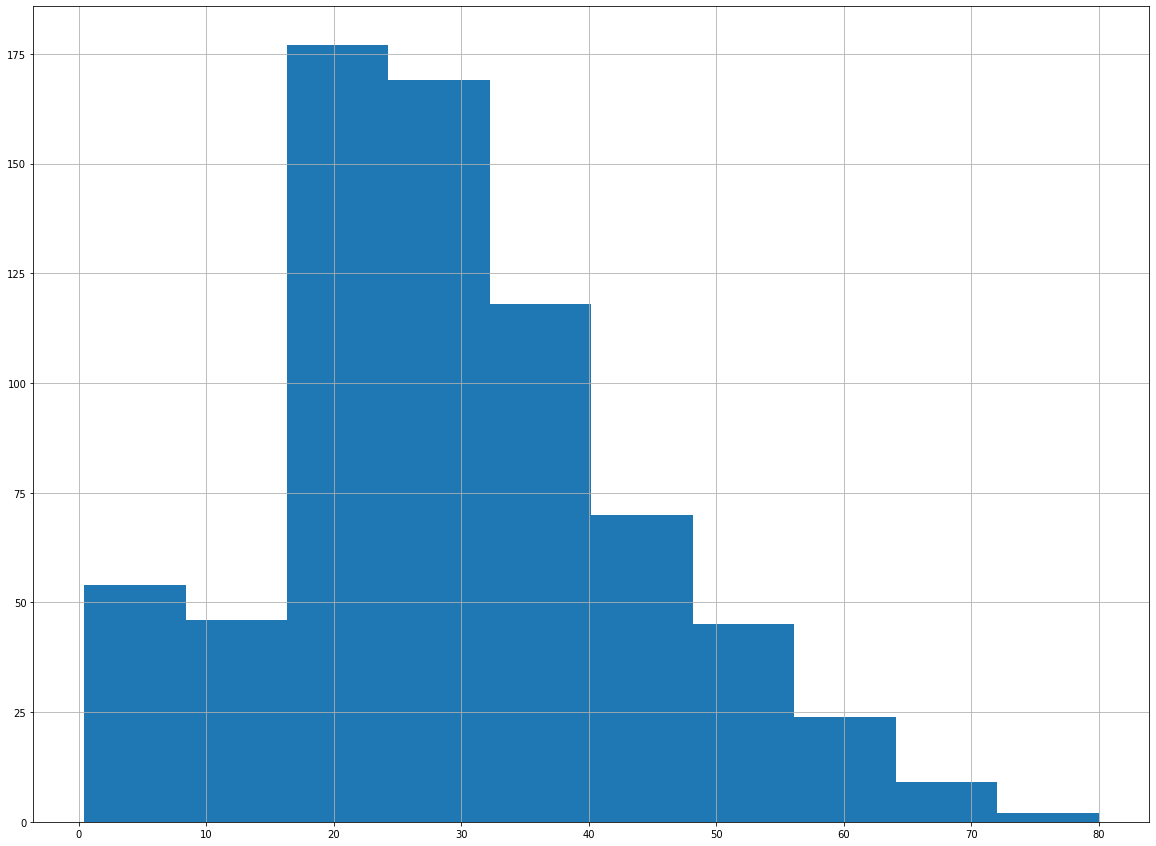

In [39]:
freq_graph = titanic_data['Age']
freq_graph.hist(figsize=(20, 15))
plt.show()

The distribution of age is right skewed, so we can replace the missing values of age with the median.

In [41]:
titanic_data.Age = titanic_data['Age'].fillna(titanic_data['Age'].median())

In [42]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

In [43]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Checking for outliers in Age column

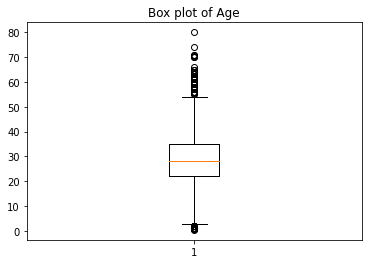

In [44]:
plt.boxplot(titanic_data.Age)
plt.title('Box plot of Age')
plt.show()

There are outliers in the age column, so we have to remove it.

In [46]:
Q1 = np.percentile(titanic_data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(titanic_data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(titanic_data['Age'], 75, interpolation='midpoint')
print(f'Q1 = {Q1}\nQ2 = {Q2}\nQ3 = {Q3}')

Q1 = 22.0
Q2 = 28.0
Q3 = 35.0


In [48]:
IQR = Q3 - Q1
print(f'IQR = {IQR}')

IQR = 13.0


In [49]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f'Lower limit = {lower_limit}\nUpper limit = {upper_limit}')

Lower limit = 2.5
Upper limit = 54.5


In [52]:
outlier = []
for x in titanic_data['Age']:
    if x > upper_limit or x < lower_limit:
        outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [55]:
index_outlier = titanic_data["Age"] < lower_limit
titanic_data.drop(titanic_data.loc[index_outlier].index , inplace = True)

In [56]:
index_outlier = titanic_data["Age"] > upper_limit
titanic_data.drop(titanic_data.loc[index_outlier].index , inplace = True)

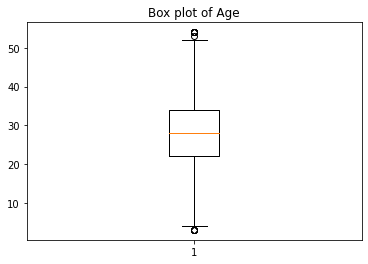

In [57]:
plt.boxplot(titanic_data.Age)
plt.title('Box plot of Age')
plt.show()

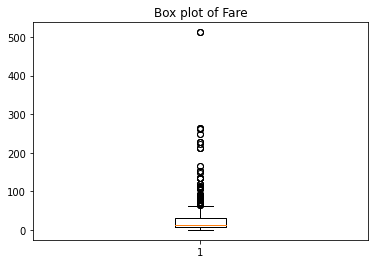

In [58]:
plt.boxplot(titanic_data.Fare)
plt.title('Box plot of Fare')
plt.show()

In [59]:
Q1 = np.percentile(titanic_data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(titanic_data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(titanic_data['Fare'], 75, interpolation='midpoint')
print(f'Q1 = {Q1}\nQ2 = {Q2}\nQ3 = {Q3}')

Q1 = 7.8958
Q2 = 13.4167
Q3 = 30.0708


In [60]:
IQR = Q3 - Q1
print(f'IQR = {IQR}')

IQR = 22.174999999999997


In [61]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f'Lower limit = {lower_limit}\nUpper limit = {upper_limit}')

Lower limit = -25.366699999999994
Upper limit = 63.333299999999994


In [62]:
outlier = []
for x in titanic_data['Fare']:
    if x > upper_limit or x < lower_limit:
        outlier.append(x)
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]


In [63]:
index_outlier = titanic_data["Fare"] < lower_limit
titanic_data.drop(titanic_data.loc[index_outlier].index , inplace = True)

In [66]:
index_outlier = titanic_data["Fare"] > upper_limit
titanic_data.drop(titanic_data.loc[index_outlier].index , inplace = True)

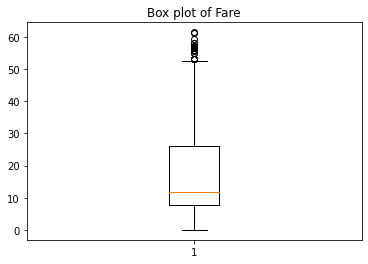

In [67]:
plt.boxplot(titanic_data.Fare)
plt.title('Box plot of Fare')
plt.show()

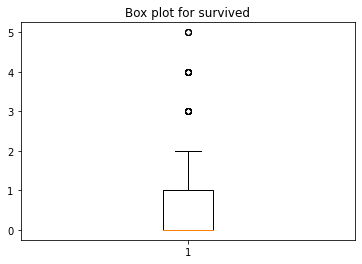

In [70]:
plt.boxplot(titanic_data['S'])
plt.title('Box plot for survived')
plt.show()

It seems like SibSp column contains oulier. So we have to remove those outliers.

In [82]:
titanic_data['SibSp'].value_counts()

0    519
1    152
2     18
Name: SibSp, dtype: int64

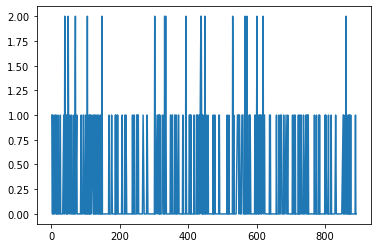

In [78]:
plt.plot(titanic_data['SibSp'])

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [83]:
from sklearn import preprocessing

In [ ]:
min_max = preprocessing.MinMaxScaler(feature_range=(0, 1))